### 这一节我们来看一下SGD

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3 + np.random.normal(0, 3, size=m)

In [3]:
x[:20]

array([ 0.7470672 ,  1.33453312, -1.42562665, -0.30546548,  2.08316045,
       -0.36714736,  0.37095781, -0.32138056,  0.48310512,  0.20812109,
       -1.18263854, -1.26070096,  0.6663805 ,  0.88066659, -1.52499514,
        0.68167542,  0.400275  , -0.28589357, -0.28418849,  0.35510713])

In [4]:
y[:20]

array([ 4.32369432,  9.03523797, -2.87364456,  0.25124777, 13.81582479,
       -5.59116296, -1.62662769,  2.58761923,  6.59460718, -1.43275493,
       -5.36183067, -3.4451782 ,  2.23587208,  5.25474688, -3.92459959,
        6.74017019,  2.03497185,  5.6988213 ,  2.77063639,  7.12852779])

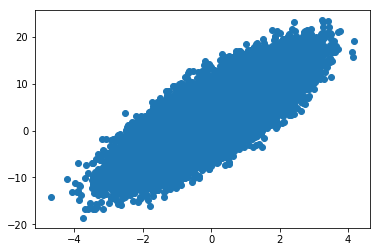

In [5]:
plt.scatter(x, y)
plt.show()

### 我们复用我们上一节的代码

In [0]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    
    return res * 2 / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

### 计算一下运行这个梯度下降的时间

In [7]:
X_b = np.hstack([np.ones((len(X), 1)), X])
X_b[:5]

array([[ 1.        ,  0.7470672 ],
       [ 1.        ,  1.33453312],
       [ 1.        , -1.42562665],
       [ 1.        , -0.30546548],
       [ 1.        ,  2.08316045]])

In [8]:
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
initial_theta

array([0., 0.])

In [9]:
%%time
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 1.51 s, sys: 740 ms, total: 2.25 s
Wall time: 1.15 s


In [10]:
theta

array([3.02627616, 4.00117186])

### 随机梯度下降法

In [0]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):
    # 此处是为了让学习率越来越小，避免直接跳过最优解
    # 这是由于SGD本身的特性决定的
    # t0和t1是两个超参数，可自行调节
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        # 随机取一个数据
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        # 我们选用的是当前步数的倒数作为学习率，这样就实现了学习率越来越小
        # 但是为了防止一开始学习率过大，我们分子和分母各增加参数进行调节
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [12]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

CPU times: user 251 ms, sys: 27 ms, total: 278 ms
Wall time: 252 ms


In [13]:
theta

array([3.03207021, 3.95864684])

可以看到最终的参数是近似的，但是时间提升了很多